In [1]:
import pandas as pd

dt= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem1.csv')
dt.head()

Time        V1        V2        V3        V4        V5        V6  \
0   60.0  1.069141  0.043786  0.309867  1.316694 -0.462394 -0.857888   
1  406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
2  426.0 -1.932055  1.724618  1.288229 -0.396998 -0.140202  2.470521   
3  472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4  674.0 -0.719065  0.638954  0.686335 -0.023240  2.317890  3.871978   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.207904 -0.191270  0.056398  0.041567 -0.507358 -0.108666 -0.473257   
1 -2.537387  1.391657 -2.770089 -2.772272  3.202033 -2.899907 -0.595222   
2 -1.865298 -5.186855  0.794764  0.155379  0.034517  0.906738 -0.027172   
3  0.325574 -0.067794 -0.270953 -0.838587 -0.414575 -0.503141  0.676502   
4 -0.312797  1.089780 -0.596925 -0.006142 -0.242883 -0.384491  0.109079   

        V14       V15       V16       V17  Amount  Class  
0  0.452046  1.005675  0.185441 -0.439976   89.40      0  
1 -4.289254  0.389724 -1.140747 -2.830056    0.00      1  
2 -0.404303 -0.473949  0.274034 -0.222340   16.19      0  
3 -1.692029  2.000635  0.666780  0.599717  529.00      1  
4  0.187565  1.823472  0.274346 -0.697730   22.00      0

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# 그래프에서 한글깨짐 현상 수정
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## ADP 23회 실기기출

#### 1 -(1) : EDA 후, 분석가 입장에서 의미를 탐색

In [6]:
df =pd.read_csv('C:/Users/hylee/python/ADP/data/23/problem1.csv')
df.info()

In [7]:
# 결측치 확인
display(df.isnull().sum())

date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64

In [8]:
# 결측치일때의 날짜값을 출력
print(df[df.CO2.isnull()].date.values)

['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']


### 상관성 시각화 Pairplot

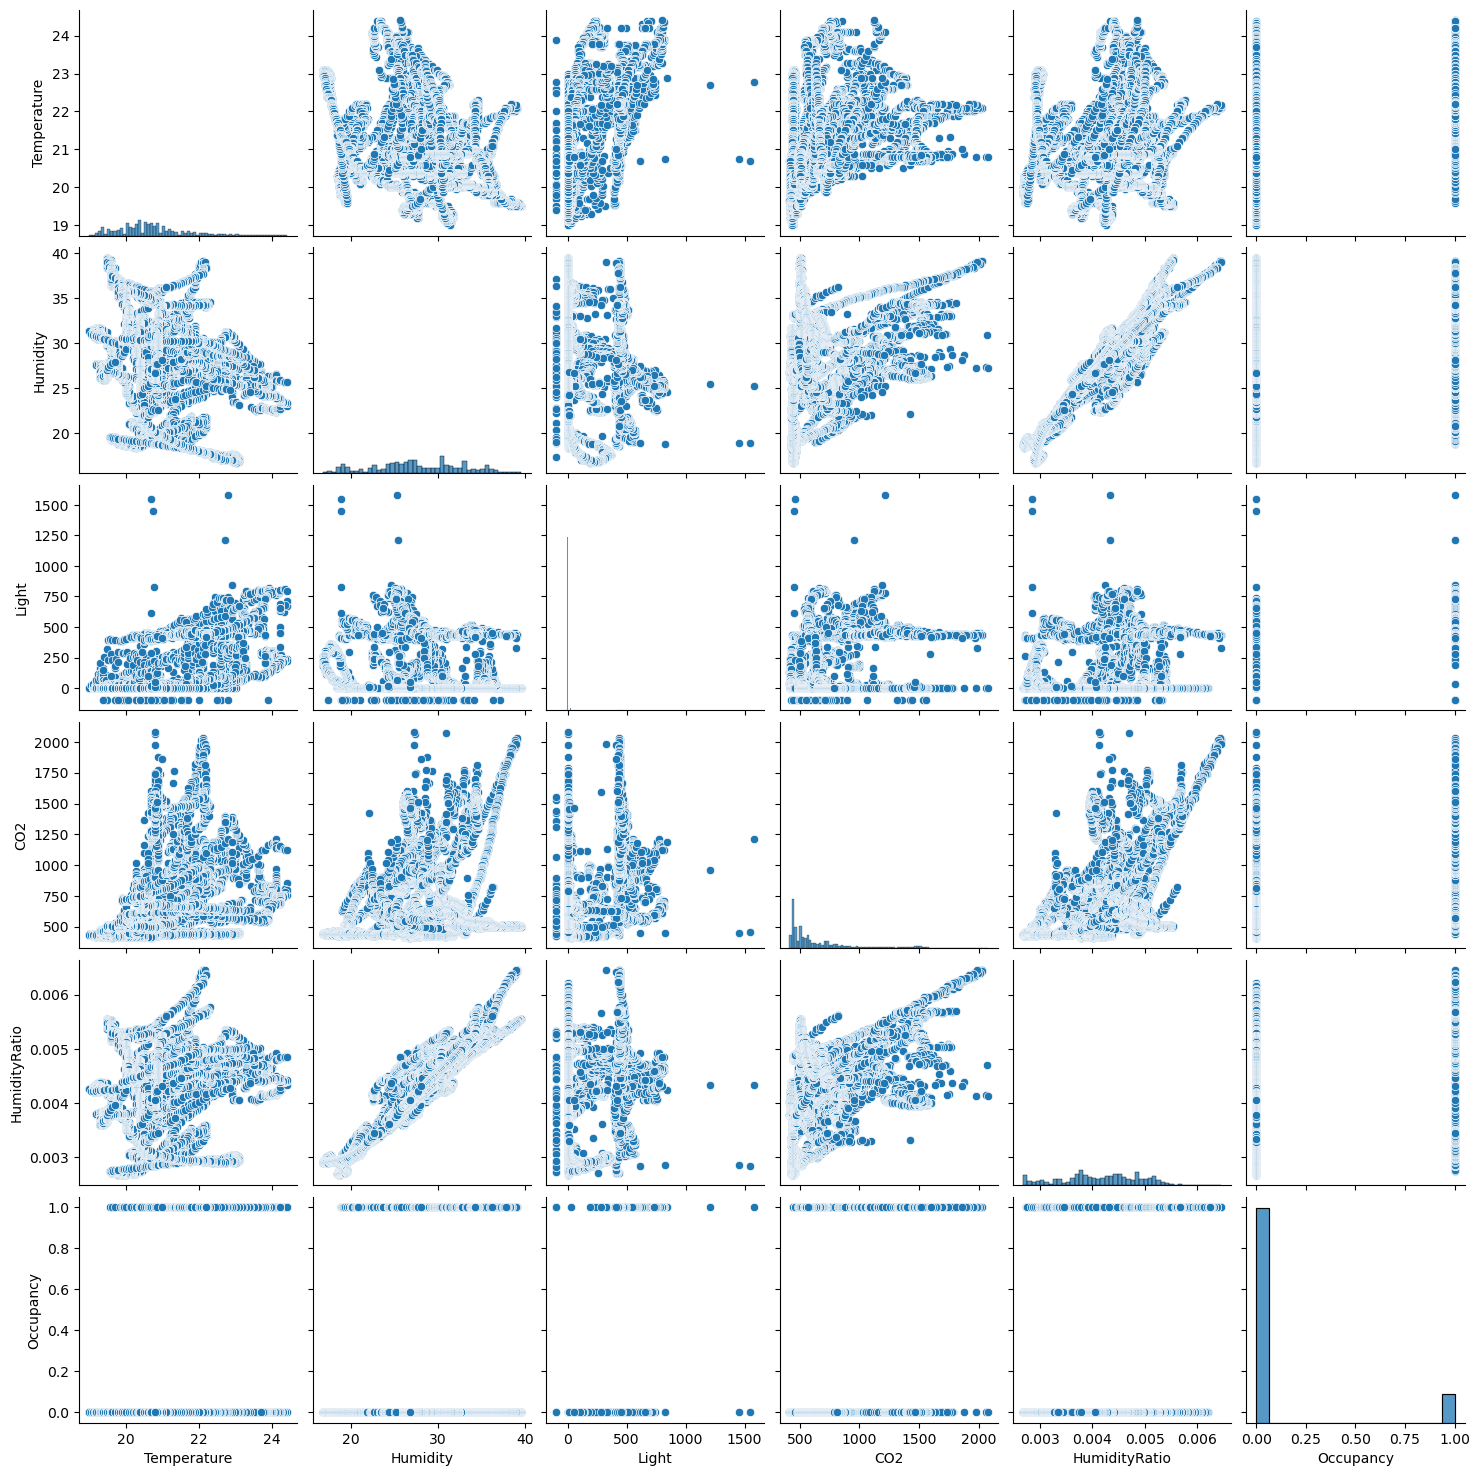

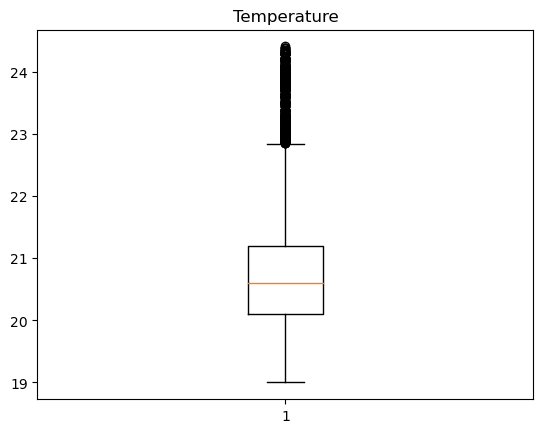

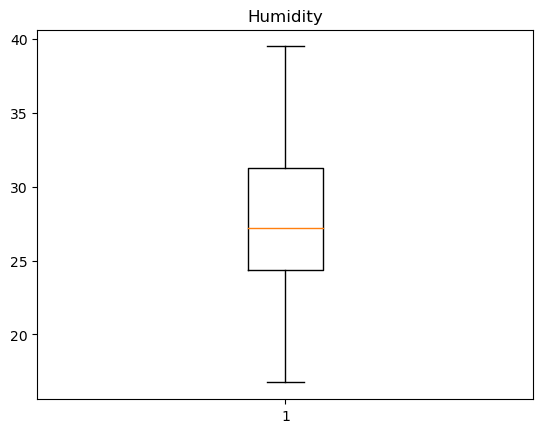

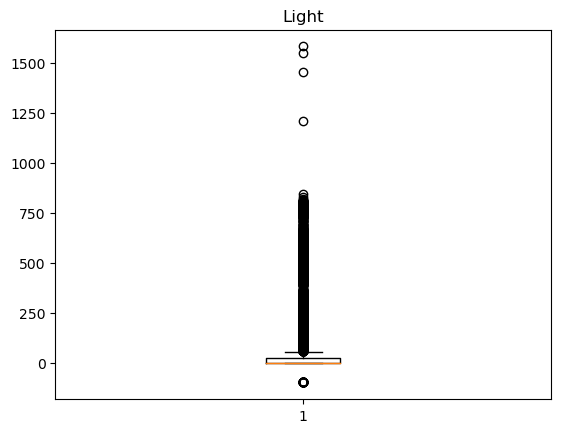

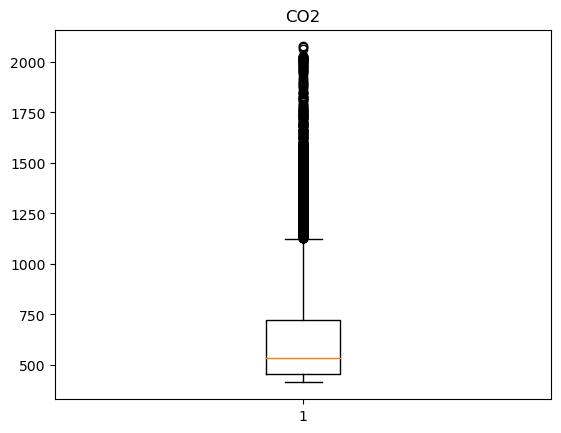

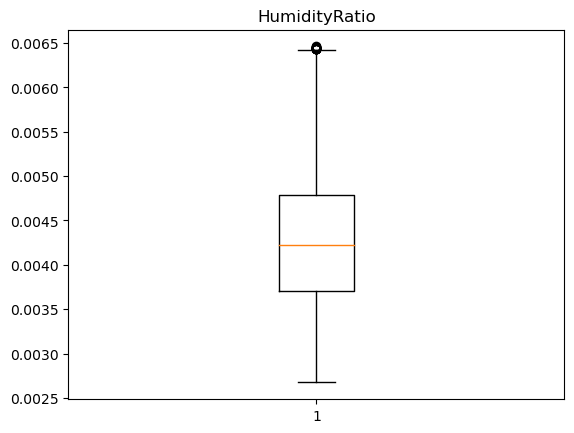


Humidity, HumidityRatio컬럼은 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

for v in df.select_dtypes(include='float'):
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()
    
print('''
Humidity, HumidityRatio컬럼은 높은 상관관계를 보이며, 두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다
''')

### Describe : count, mean, std, min, Q1,Q2,Q3

In [10]:
display(df.describe()) 
display(df[df.Light <0].shape)
print('''
Light컬럼의 경우 -99인 값이 50개 존재한다. 
''')

(50, 7)

Temperature      Humidity         Light           CO2  HumidityRatio  \
count  17910.000000  17910.000000  17910.000000  17889.000000   17910.000000   
mean      20.749036     27.589163     78.157369    647.700865       0.004175   
std        0.994012      5.043595    168.574068    285.997340       0.000755   
min       19.000000     16.745000    -99.000000    412.750000       0.002674   
25%       20.100000     24.390000      0.000000    453.000000       0.003702   
50%       20.600000     27.200000      0.000000    532.666667       0.004222   
75%       21.200000     31.290000     22.000000    722.000000       0.004790   
max       24.408333     39.500000   1581.000000   2076.500000       0.006461   

          Occupancy  
count  17910.000000  
mean       0.117253  
std        0.321730  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000


Light컬럼의 경우 -99인 값이 50개 존재한다. 



In [11]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

##### df['date'].diff().dt.seconds.dropna() :  Data간의 차이를 초로 확인했을때

In [15]:
timedeltas = df['date'].diff().dt.seconds.dropna()  
display(timedeltas.describe())
print()

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64

In [16]:
print('''
75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다. 
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼수 있다
''')


75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다. 
연속된 데이터간의 최대 시간차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼수 있다



#### 1-(2) : 결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

CO2 컬럼에 nan값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy값이 변화하지 않거나, date값이 3분이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체 한다. 위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 데이터의 품질을 손상 시키지 않다고 판단 할 수 있다

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           17910 non-null  datetime64[ns]
 1   Temperature    17910 non-null  float64       
 2   Humidity       17910 non-null  float64       
 3   Light          17910 non-null  float64       
 4   CO2            17889 non-null  float64       
 5   HumidityRatio  17910 non-null  float64       
 6   Occupancy      17910 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 979.6 KB


In [20]:
for value in df[df.CO2.isnull()].index:
    target = df.iloc[value-1:value+2]

    difftime = target['date'].diff().dt.seconds.dropna()

    if target.Occupancy.nunique() == 1 and len(difftime[difftime>180]) == 0:  
        # occupancy값이 변화하지 않고, 근처 data의 difftime이 모두 3분이내면
        df.loc[value,'CO2'] = df.loc[value-1].CO2 
        # 이전 'CO2' Value로 대체하겠다

#### 1-(3) : 데이터의 질 및 품질관리를 향상시킬만한 내용을 작성

Light 칼럼에서 -99가 너무 많았던 것은, 예외 값에 대해 임의 값을 입력한 것으로 생각해 볼 수 있다. 
그래서 -99를 칼럼의 최솟값인 0으로 대체해본다. 

평균적으로 개체간 시간은 1분 간격이나, 최대 7시간의 공백이 존재한다. 이를 보간하는 것도 방법일 수 있지만 시계열모델을 사용하지는 않기때문에 보간하지않고 모델링을 진행한다.

In [21]:
df.loc[df.Light ==-99,'Light'] = 0

#### 2-(1) : 데이터에 불균형이 있는지 확인한다. 불균형 판단의 근거를 작성한다.

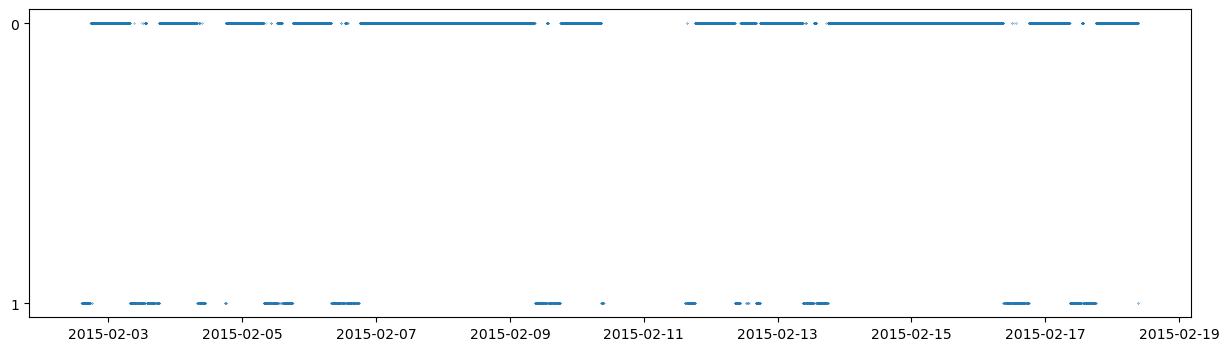


Occupancy 의 경우 7:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다



In [26]:
plt.figure(figsize=(15,4))
plt.scatter(df['date'],df['Occupancy'].astype('str'),s=0.03)
plt.show()

print('''
Occupancy 의 경우 7:1의 비율로 데이터 불균형이 존재한다.
위의 그래프에서 보면 2월 7일~9일 , 2월 14~16일까지는 객실이 비어있다. 이처럼 객실이 비어있지 않는 경우 보다 비어있는 경우가 더 많기에 불균형이 존재한다
''')

In [27]:
df.Occupancy.value_counts()

0    15810
1     2100
Name: Occupancy, dtype: int64

#### 2 - (2)
오버샘플링 방법들 중 2개 선택하고 장단점 등 선정 이유 제시

- 랜덤오버샘플링
소수 클래스 데이터중 랜덤샘플링하여 다수 클래스 데이터 숫자와 맞추는 방식
장점 : 데이터 불균형 문제 해결
단점 : 종속변수에 대한 고려없이 중복 생성, overfitting의 가능성이 존재
- SMOTE
소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
장점 : 데이터 불균형 문제 해결, 데이터 분포를 고려한 중복없는 데이터 생성
단점 : 고차원 데이터에는 문제가 발생할 수 있다

#### 2 - (3)
오버샘플링 수행 및 결과, 잘 되었다는 것을 판단해라

### ADP 20회 실기기출

날씨 온도 예측, 종속변수 :actual(최고온도)

- 데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

- 데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv

- temp_1 : 전날 최고온도
- temp_2 : 전전날 최고온도
- friend : 친구의 예측온도

#### 1-1 데이터 확인 및 전처리
- 데이터 EDA 수행
- 결측치를 확인하고 처리 방안에 대해 논의하라
- 데이터 분할 방법 설명
- 최종 데이터셋이 적절함을 주장하라

In [42]:
adp20_p1= pd.read_csv('C:/Users/hylee/python/ADP/data/20/problem1.csv')
adp20_p1.head()

year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41

In [43]:
adp20_p1.info()
adp20_p1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


(348, 12)

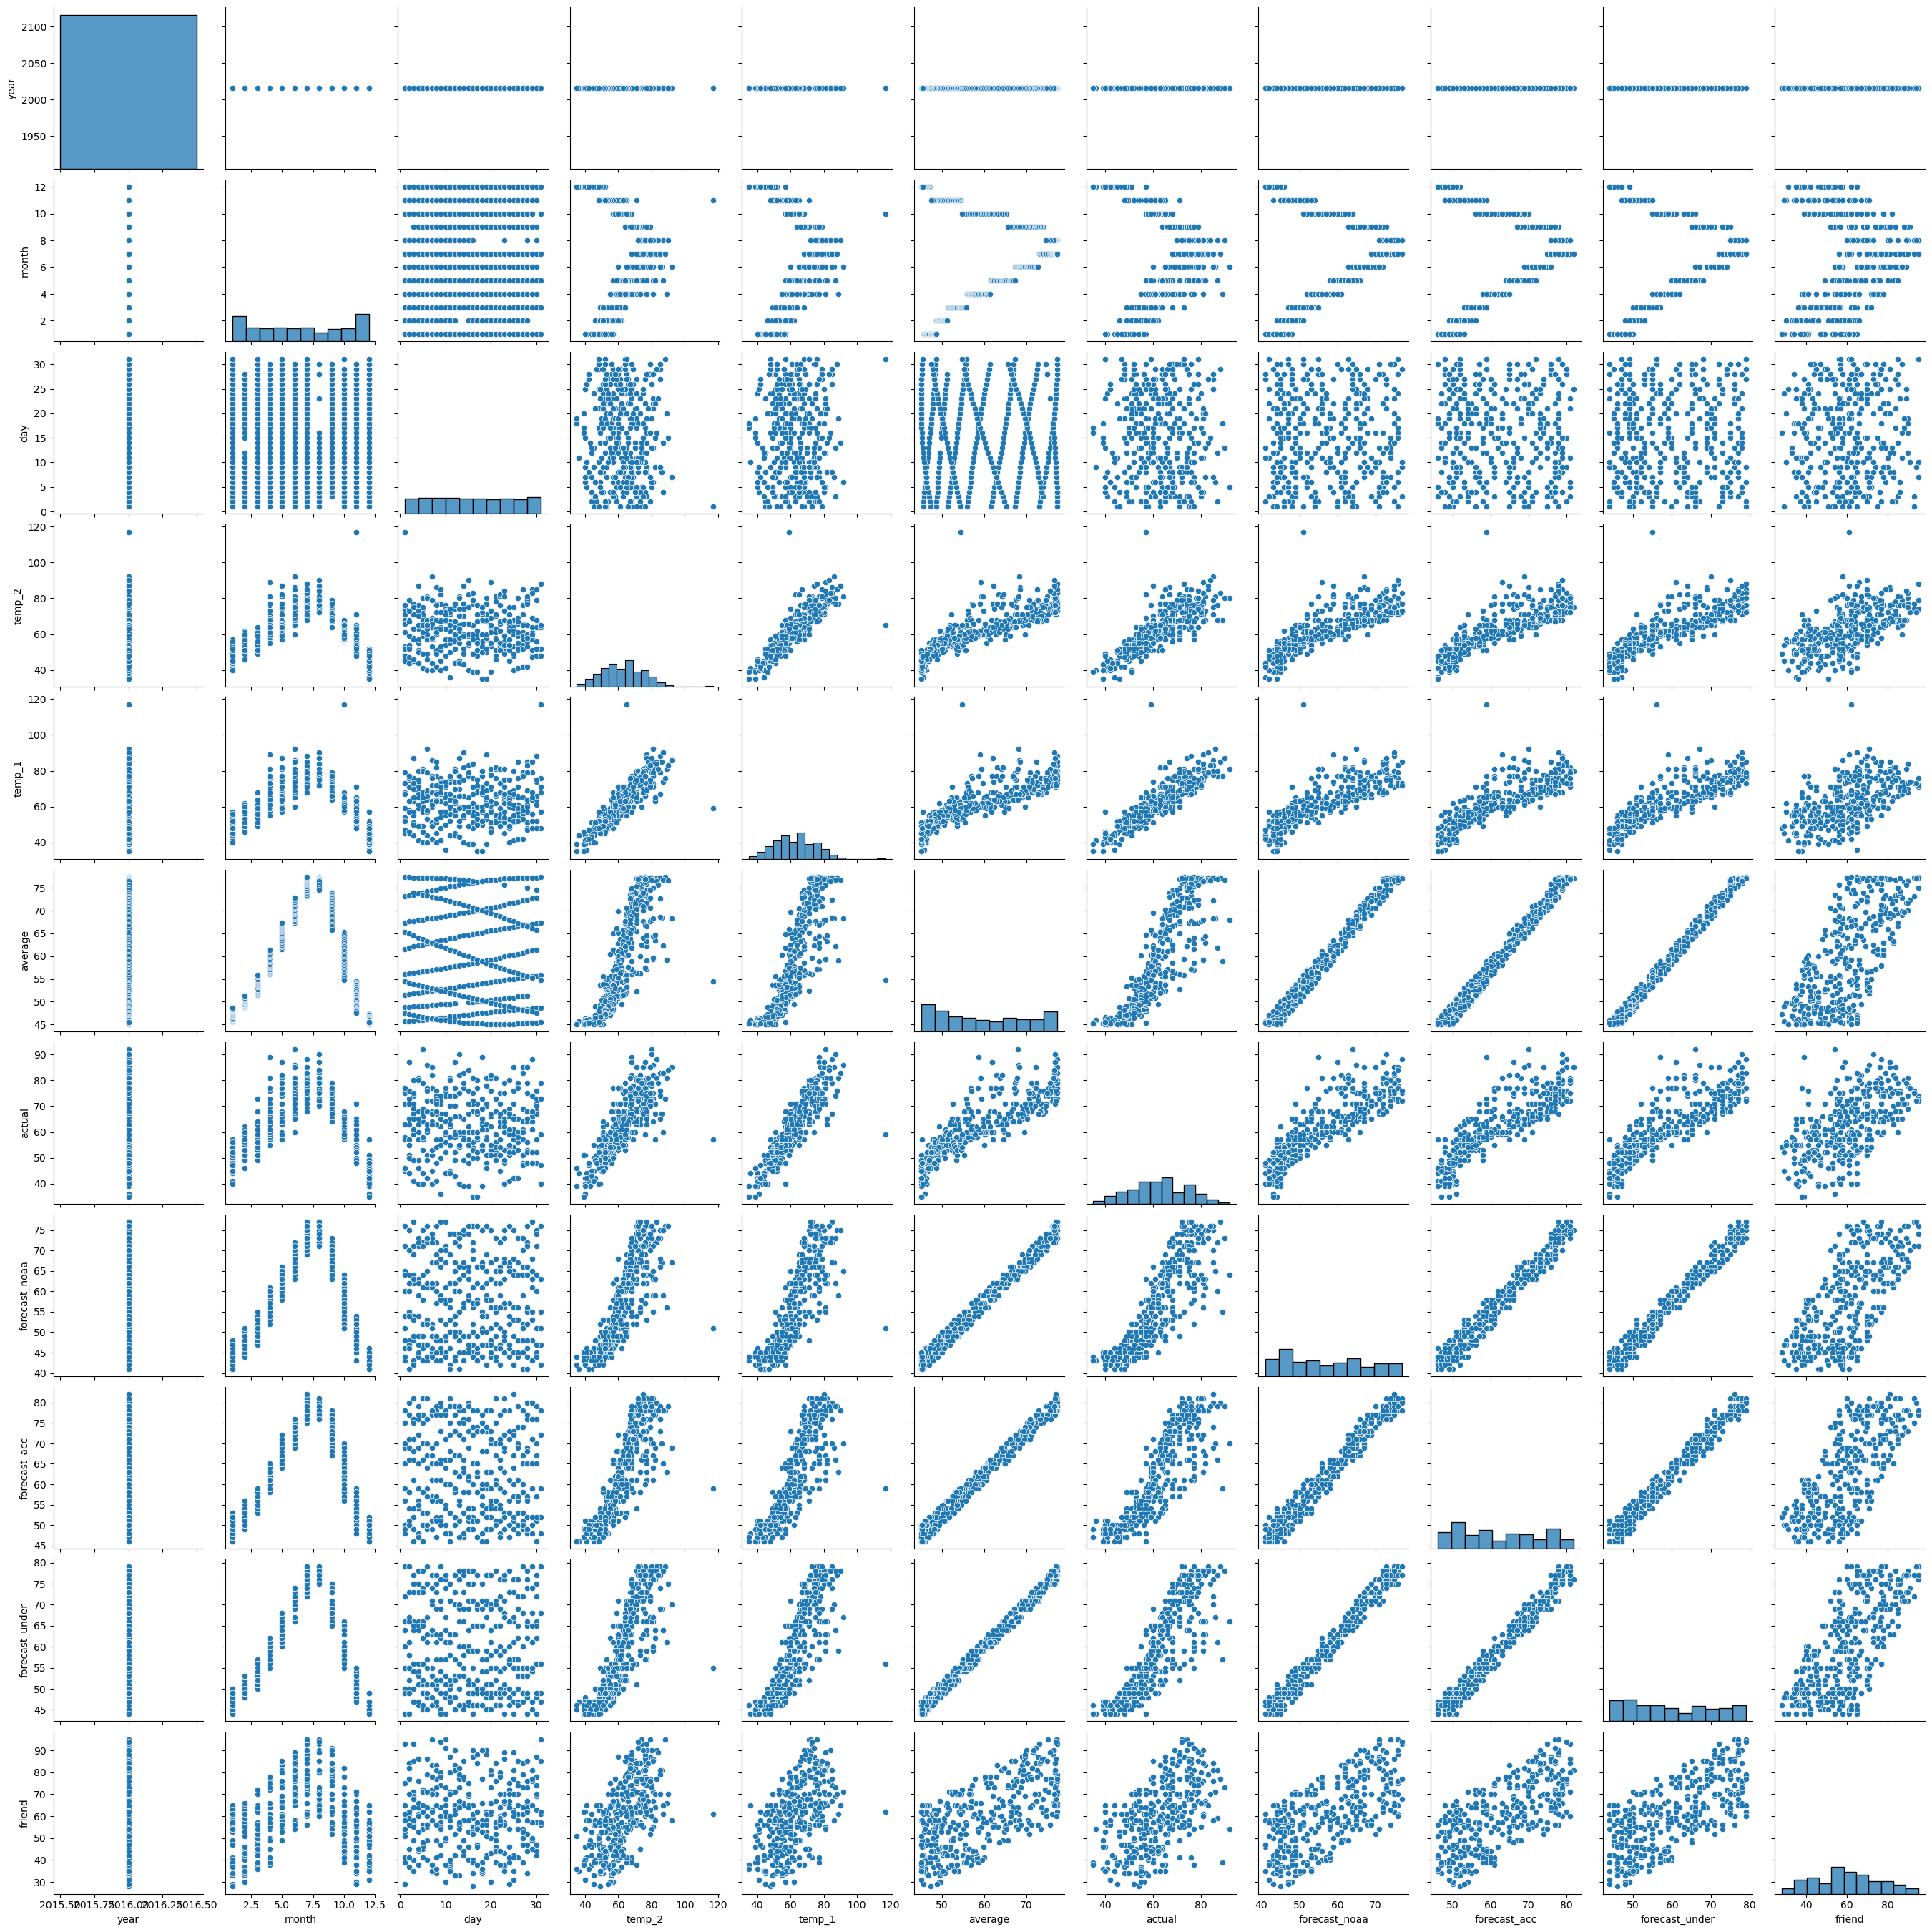

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(adp20_p1)
plt.show()



상관성을 보이는 변수관계를 확인할 수 있다.
temp_1, temp_2, average, actual, forecast_noaa, forcast_acc, forecast_under, friend
변수 간에는 어느정도의 상관성이 보임을 확인 할 수 있다.

#### 불필요한 시간 변수 제거. 
week의 경우 one-hot-in 코딩으로 추가한다

In [44]:
adp20_p1.describe()

year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12.120542   10.527306   
min    2016.0    1.000000    1.000000   35.000000   35.000000   45.100000   
25%    2016.0    3.000000    8.000000   54.000000   54.000000   49.975000   
50%    2016.0    6.000000   15.000000   62.500000   62.500000   58.200000   
75%    2016.0   10.000000   23.000000   71.000000   71.000000   69.025000   
max    2016.0   12.000000   31.000000  117.000000  117.000000   77.400000   

           actual  forecast_noaa  forecast_acc  forecast_under      friend  
count  348.000000     348.000000    348.000000      348.000000  348.000000  
mean    62.543103      57.238506     62.373563       59.772989   60.034483  
std     11.794146      10.605746     10.549381       10.705256   15.626179  
min     35.000000      41.000000     46.000000       44.000000   28.000000  
25%     54.000000      48.000000     53.000000       50.000000   47.750000  
50%     62.500000      56.000000     61.000000       58.000000   60.000000  
75%     71.000000      66.000000     72.000000       69.000000   71.000000  
max     92.000000      77.000000     82.000000       79.000000   95.000000

In [52]:
# date = year - month - day 구조의 변수로 정리한다
adp20_p1['date'] =adp20_p1['year'].astype('str')+'-'+adp20_p1['month'].astype('str')+'-'+adp20_p1['day'].astype('str')  
adp20_p1['date'] = pd.to_datetime(adp20_p1['date'])
print(adp20_p1['date'])

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-04
4     2016-01-05
         ...    
343   2016-12-27
344   2016-12-28
345   2016-12-29
346   2016-12-30
347   2016-12-31
Name: date, Length: 348, dtype: datetime64[ns]


#### 시계열 데이터의 결측치를 보간법으로 확인하기

In [60]:
v = pd.DataFrame(pd.date_range(start=adp20_p1['date'].dt.strftime('%Y-%m-%d').min(), end=adp20_p1['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values
# strftime() :dataformat(str) -> Series[str]
print(v)

['2016-01-01' '2016-01-02' '2016-01-03' '2016-01-04' '2016-01-05'
 '2016-01-06' '2016-01-07' '2016-01-08' '2016-01-09' '2016-01-10'
 '2016-01-11' '2016-01-12' '2016-01-13' '2016-01-14' '2016-01-15'
 '2016-01-16' '2016-01-17' '2016-01-18' '2016-01-19' '2016-01-20'
 '2016-01-21' '2016-01-22' '2016-01-23' '2016-01-24' '2016-01-25'
 '2016-01-26' '2016-01-27' '2016-01-28' '2016-01-29' '2016-01-30'
 '2016-01-31' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-06' '2016-02-07' '2016-02-08' '2016-02-09'
 '2016-02-10' '2016-02-11' '2016-02-12' '2016-02-13' '2016-02-14'
 '2016-02-15' '2016-02-16' '2016-02-17' '2016-02-18' '2016-02-19'
 '2016-02-20' '2016-02-21' '2016-02-22' '2016-02-23' '2016-02-24'
 '2016-02-25' '2016-02-26' '2016-02-27' '2016-02-28' '2016-02-29'
 '2016-03-01' '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05'
 '2016-03-06' '2016-03-07' '2016-03-08' '2016-03-09' '2016-03-10'
 '2016-03-11' '2016-03-12' '2016-03-13' '2016-03-14' '2016-03-15'
 '2016-03-

In [62]:
difference = set(v) - set(adp20_p1['date'].dt.strftime('%Y-%m-%d'))
print(difference)
len(difference)

{'2016-08-18', '2016-08-26', '2016-09-01', '2016-10-30', '2016-08-20', '2016-02-13', '2016-08-17', '2016-09-02', '2016-08-21', '2016-08-25', '2016-02-29', '2016-08-22', '2016-08-27', '2016-08-19', '2016-08-24', '2016-02-14', '2016-08-31', '2016-08-29'}
 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.



시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.

문제 해결시 시계열 방식으로 접근 하지 않을 것이기에 누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시 하여 처리할 수 있다.

year, month, day, week, 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.
train셋과 test셋은 8:2비율로 나눠서 모델링을 진행한다.
friend 컬럼의 경우 상관관계를 확인했을때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다

In [63]:
adp20_p1.corr()

year     month       day    temp_2    temp_1   average  \
year             NaN       NaN       NaN       NaN       NaN       NaN   
month            NaN  1.000000 -0.000412  0.047651  0.032664  0.120806   
day              NaN -0.000412  1.000000 -0.046194 -0.000691 -0.021136   
temp_2           NaN  0.047651 -0.046194  1.000000  0.857800  0.821560   
temp_1           NaN  0.032664 -0.000691  0.857800  1.000000  0.819328   
average          NaN  0.120806 -0.021136  0.821560  0.819328  1.000000   
actual           NaN  0.004529 -0.021675  0.805835  0.877880  0.848365   
forecast_noaa    NaN  0.131141 -0.021393  0.813134  0.810672  0.990340   
forecast_acc     NaN  0.127436 -0.030605  0.817374  0.815162  0.990705   
forecast_under   NaN  0.119786 -0.013727  0.819576  0.815943  0.994373   
friend           NaN  0.048145  0.024592  0.583758  0.541282  0.689278   

                  actual  forecast_noaa  forecast_acc  forecast_under  \
year                 NaN            NaN           NaN             NaN   
month           0.004529       0.131141      0.127436        0.119786   
day            -0.021675      -0.021393     -0.030605       -0.013727   
temp_2          0.805835       0.813134      0.817374        0.819576   
temp_1          0.877880       0.810672      0.815162        0.815943   
average         0.848365       0.990340      0.990705        0.994373   
actual          1.000000       0.838639      0.842135        0.838946   
forecast_noaa   0.838639       1.000000      0.979863        0.985670   
forecast_acc    0.842135       0.979863      1.000000        0.983910   
forecast_under  0.838946       0.985670      0.983910        1.000000   
friend          0.569145       0.669221      0.696054        0.691177   

                  friend  
year                 NaN  
month           0.048145  
day             0.024592  
temp_2          0.583758  
temp_1          0.541282  
average         0.689278  
actual          0.569145  
forecast_noaa   0.669221  
forecast_acc    0.696054  
forecast_under  0.691177  
friend          1.000000

In [64]:
dfd = pd.get_dummies(adp20_p1)
df_drop = dfd.drop(columns=['year','month','day','friend','date'])

X = df_drop.drop(columns=['actual']) # 학습시킬 독립변수 셋 X
y = df_drop['actual']  # 실제 값 Y

from sklearn.model_selection import train_test_split

X_train,X_test , y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)   # TRIAN : TEST = 8 :2 , test_size = 0.2

## ADP 실기 20회 2번
- 5분간격의 가구별 전력 사용량의 데이터
- 데이터 출처 : 자체생성

### 2-1 데이터 전처리
각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.
군집화를 위한 데이터 구성의 이유를 설명하라
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음

In [66]:
import matplotlib.pyplot as plt
ttt= pd.read_csv('C:/Users/hylee/python/ADP/data/20/problem2.csv')

In [67]:
ttt.head()

houseCode                 date  power consumption
0  house_01  2050-01-14 21:00:00          57.559878
1  house_26  2050-01-02 19:10:00          59.726880
2  house_25  2050-01-13 07:20:00           6.558823
3  house_20  2050-01-26 04:55:00          58.514589
4  house_09  2050-01-18 22:50:00           5.717009

In [73]:
ttt.info()
ttt.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401760 entries, 0 to 401759
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   houseCode          401760 non-null  object 
 1   date               401760 non-null  object 
 2   power consumption  401760 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB


(401760, 3)

In [74]:
ttt.describe()

power consumption
count      401760.000000
mean           79.686964
std            60.230711
min             0.000207
25%            31.764479
50%            67.363793
75%           114.926222
max           446.190933

In [90]:
tt = ttt.sort_values(['houseCode','date']).reset_index(drop=True) # Sorting하고, index는 지우겠다
tt.head(n=5)

houseCode                 date  power consumption
0  house_00  2050-01-01 00:00:00          58.253938
1  house_00  2050-01-01 00:05:00          21.731130
2  house_00  2050-01-01 00:10:00          56.264884
3  house_00  2050-01-01 00:15:00          27.894691
4  house_00  2050-01-01 00:20:00          24.690939

##### 'HouseCode'변수 Grouping / 'data'변수에서 15분 간격 / 'power consumption' 변수를 Sum으로 묶겠다

In [91]:
tt['date'] = pd.to_datetime(tt['date'])

tg = tt.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()
tg.head(n=5)


houseCode                date  power consumption
0  house_00 2050-01-01 00:00:00         136.249952
1  house_00 2050-01-01 00:15:00          98.283387
2  house_00 2050-01-01 00:30:00          53.967679
3  house_00 2050-01-01 00:45:00         204.821270
4  house_00 2050-01-01 01:00:00         150.760786

Grouping전 원래 data와 비교했을 때 house_00그룹에서 date min 5분, 10분, 15분이 grouping되어 power consumption이 summation된 것이 확인가능하다.

In [92]:
tg.tail(n=5)

houseCode                date  power consumption
133915  house_44 2050-01-31 22:45:00         334.675717
133916  house_44 2050-01-31 23:00:00         463.419892
133917  house_44 2050-01-31 23:15:00         369.930740
133918  house_44 2050-01-31 23:30:00         237.713030
133919  house_44 2050-01-31 23:45:00         184.888439

##### 변수 명 바꾸고 / HouseCode변수에서 code 파생변수 / 시간, 날짜 파생변수 만들기

In [95]:
tg = tg.rename(columns= {'power consumption':'power consumption sum'})

tgg = tg.copy()

tgg['c'] =tgg['houseCode'].str[-2:].astype('int')
tgg['d'] =tgg['date'].dt.hour
tgg['e'] =tgg['date'].dt.day


In [96]:
tgg.head(n=10)

houseCode                date  power consumption sum  c  d  e
0  house_00 2050-01-01 00:00:00             136.249952  0  0  1
1  house_00 2050-01-01 00:15:00              98.283387  0  0  1
2  house_00 2050-01-01 00:30:00              53.967679  0  0  1
3  house_00 2050-01-01 00:45:00             204.821270  0  0  1
4  house_00 2050-01-01 01:00:00             150.760786  0  1  1
5  house_00 2050-01-01 01:15:00             106.759160  0  1  1
6  house_00 2050-01-01 01:30:00             263.692631  0  1  1
7  house_00 2050-01-01 01:45:00             375.184153  0  1  1
8  house_00 2050-01-01 02:00:00             207.625792  0  2  1
9  house_00 2050-01-01 02:15:00             117.127834  0  2  1

#### KMeans로 Clustering
- KMeans 함수명 설정
- 사용할 데이터 셋만 추려서, kmeans function fitting
- 원래 데이터 셋에 군집변수 추가 : kmeans.labels

In [97]:
from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)   
kmeans.fit(tgg.iloc[:,2:].values)   

tg['Cluster'] = kmeans.labels_

tg

houseCode                date  power consumption sum  Cluster
0       house_00 2050-01-01 00:00:00             136.249952        3
1       house_00 2050-01-01 00:15:00              98.283387        3
2       house_00 2050-01-01 00:30:00              53.967679        3
3       house_00 2050-01-01 00:45:00             204.821270        0
4       house_00 2050-01-01 01:00:00             150.760786        0
...          ...                 ...                    ...      ...
133915  house_44 2050-01-31 22:45:00             334.675717        1
133916  house_44 2050-01-31 23:00:00             463.419892        4
133917  house_44 2050-01-31 23:15:00             369.930740        1
133918  house_44 2050-01-31 23:30:00             237.713030        2
133919  house_44 2050-01-31 23:45:00             184.888439        0

[133920 rows x 4 columns]

## ADP 20회 실기 기출문제 3번 태양광 데이터
- 예측 변수 :SOLAR PV

- 데이터 경로 : /kaggle/input/adp-kr-p2/problem3.csv
- 데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018

#### 3-1 데이터셋 분할 및 결과 검증

- 데이터셋 7:3 분할
- 데이터 전처리 및 예측 모델 생성

- 모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라
- 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값)
- 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.
- 분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

- 최종 결과 제출 : 소수점 3째자리 반올림

In [104]:
dt3= pd.read_csv('C:/Users/hylee/python/ADP/data/20/problem3.csv')
dt3 = dt3.drop(columns =['SOLAR'])
dt3.head()


TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
0  2012-11-26 00:00:00   208.0    354.0       926.0   1.0        208.0   
1  2012-11-26 01:00:00   207.0    354.0       927.0   2.0        207.0   
2  2012-11-26 02:00:00   208.0    353.0       927.0   3.0        208.0   
3  2012-11-26 03:00:00   208.0    350.0       927.0   4.0        209.0   
4  2012-11-26 04:00:00   209.0    352.0       927.0   5.0        209.0   

   SOLAR PV  SOLAR THERMAL  WIND TOTAL  
0       0.0            0.0        57.0  
1       0.0            0.0        76.0  
2       0.0            0.0       100.0  
3       0.0            0.0       111.0  
4       0.0            0.0       131.0

In [102]:
dt3.shape

(44904, 9)

##### 해가 떠있는 시간, 아닌시간에 대한 파생변수 생성
- suntimeChecker란 함수
- dt3['TIMESTAMP'].apply(suntimeChecker) 

apply(suntimechecker) 를 원본 데이터 time 변수에 적용해서 -> suntime이라는 파생변수생성

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


def suntimeChecker(x):
    if pd.to_datetime(x).hour in list(range(6,18)):   # 객체 x의 시간이 오전6시 ~ 오후6시안에 포함된다면
        return 1 
    else:
        return 0

dt3['TIMESTAMP'] = pd.to_datetime(dt3['TIMESTAMP'])
dt3['suntime'] = dt3['TIMESTAMP'].apply(suntimeChecker) 

In [106]:
dt3.head(n=5)

TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  \
0 2012-11-26 00:00:00   208.0    354.0       926.0   1.0        208.0   
1 2012-11-26 01:00:00   207.0    354.0       927.0   2.0        207.0   
2 2012-11-26 02:00:00   208.0    353.0       927.0   3.0        208.0   
3 2012-11-26 03:00:00   208.0    350.0       927.0   4.0        209.0   
4 2012-11-26 04:00:00   209.0    352.0       927.0   5.0        209.0   

   SOLAR PV  SOLAR THERMAL  WIND TOTAL  suntime  
0       0.0            0.0        57.0        0  
1       0.0            0.0        76.0        0  
2       0.0            0.0       100.0        0  
3       0.0            0.0       111.0        0  
4       0.0            0.0       131.0        0

#### X,Y Set 설정 / Test, Train data 분할 / Random Forest fitting

In [109]:

X = dt3.drop(columns=['TIMESTAMP','Hour','SOLAR PV'])
y= dt3['SOLAR PV']

X_train,X_test, y_train,y_test = train_test_split(X,y, random_state =2 , test_size =0.3)  #train : test = 7 : 3

rf = RandomForestRegressor() # RF 함수명 설정
rf.fit(X_train,y_train) # Train set fitting

pred = rf.predict(X_test) # train data로 fitting한 이후, x_test로 predicting


array([ 270.97,    3.99, 3389.03, ..., 1167.08,    0.  ,    0.  ])

설정한 정확도 로직
- 실제값>예측값인 경우 (1-예측값/실제값)
- 실제값<예측값인 경우 (1- 실제값/예측값)

이것들을 평균낸 후 1에서 뺀값

분수식의 분모가 0인 경우의 정확도는 0.5로 취급 에 따라 accuracy계산 function 설정

In [ ]:
def getEachAccuracy(y_true,y_pred):
    if y_true == 0:
        return 0.5
    if y_pred == 0:
        return 0.5
    
    if y_true > y_pred:
        return 1-(y_pred/y_true)
    else:
        return 1-(y_true/y_pred)
    
acc = []
for i,v in enumerate(y_test):
    acc.append(getEachAccuracy(v,pred[i]))

In [ ]:
print('RMSE',round(mean_squared_error(y_test, pred)**0.5,3))
print('r2',round(r2_score(y_test, pred),3))
print('acc',1- round(sum(acc)/len(acc),3))

## ADP 22회 실기 기출문제 1번 
- dataset : pima-indians-diabetes-database kaggle 

### 1-1 탐색적 데이터 분석 수행(시각화 포함)

In [112]:
data = pd.read_csv('C:/Users/hylee/python/ADP/data/22/data1.csv')
display(data.head())
data.info()
data.describe()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      81.976562      20.536458   79.799479   
std       3.369578   31.972618     358.835058      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000    9999.000000      99.000000  846.000000   

               BMI  DiabetesPedigreeFunction         Age     Outcome  
count   768.000000                768.000000  768.000000  768.000000  
mean     44.934766                  0.471876   34.447917    0.348958  
std     359.739733                  0.331329   36.754727    0.476951  
min       0.000000                  0.078000   21.000000    0.000000  
25%      27.300000                  0.243750   24.000000    0.000000  
50%      32.000000                  0.372500   29.000000    0.000000  
75%      36.600000                  0.626250   41.000000    1.000000  
max    9999.000000                  2.420000  999.000000    1.000000

In [118]:
data.plot(kind='box',subplots=True,layout = (3,3),figsize=(10,10))

Pregnancies                    AxesSubplot(0.125,0.653529;0.227941x0.226471)
Glucose                     AxesSubplot(0.398529,0.653529;0.227941x0.226471)
BloodPressure               AxesSubplot(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  AxesSubplot(0.125,0.381765;0.227941x0.226471)
Insulin                     AxesSubplot(0.398529,0.381765;0.227941x0.226471)
BMI                         AxesSubplot(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           AxesSubplot(0.125,0.11;0.227941x0.226471)
Age                             AxesSubplot(0.398529,0.11;0.227941x0.226471)
Outcome                         AxesSubplot(0.672059,0.11;0.227941x0.226471)
dtype: object

#### 1-2 이상치 처리(이상값 대체방안 제시)
age , bloodpressure,bmi에서 이상치값들이 확인된다. 3개미만의 이상치들이므로 해당값을 제외한 최댓값으로 대체한다

In [120]:
data.loc[data.BloodPressure ==data.BloodPressure.max(), 'BloodPressure'] = data[data.BloodPressure !=data.BloodPressure.max()].BloodPressure.max()
data.loc[data.Age ==data.Age.max(), 'Age'] = data[data.Age !=data.Age.max()].Age.max()
data.loc[data.BMI ==data.BMI.max(), 'BMI'] = data[data.BMI !=data.BMI.max()].BMI.max()

In [121]:
data[['BloodPressure','Age','BMI']].plot(kind='box')
plt.show()

<AxesSubplot:>

### ADP 17회 실기 기출문제 1번 

- 데이터 출처 : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv 일부 전처리
- 데이터 경로 : /kaggle/input/adp-kr-p3/problem1.csv
- 데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기

#### 1-1 EDA 및 데이터 전처리
시각화 및 통계량 제시

In [122]:
dt17_1 = pd.read_csv('C:/Users/hylee/python/ADP/data/17/problem1.csv')

In [123]:
dt17_1.info()
dt17_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


Id        LotArea  LotFrontage    YearBuilt     1stFlrSF  \
count  1460.000000    1460.000000  1201.000000  1460.000000  1460.000000   
mean    730.500000   10516.828082    70.049958  1971.267808  1162.626712   
std     421.610009    9981.264932    24.284752    30.202904   386.587738   
min       1.000000    1300.000000    21.000000  1872.000000   334.000000   
25%     365.750000    7553.500000    59.000000  1954.000000   882.000000   
50%     730.500000    9478.500000    69.000000  1973.000000  1087.000000   
75%    1095.250000   11601.500000    80.000000  2000.000000  1391.250000   
max    1460.000000  215245.000000   313.000000  2010.000000  4692.000000   

          2ndFlrSF  YearRemodAdd  TotRmsAbvGrd  KitchenAbvGr  BedroomAbvGr  \
count  1460.000000   1460.000000   1460.000000   1460.000000   1460.000000   
mean    346.992466   1984.865753      6.517808      1.046575      2.866438   
std     436.528436     20.645407      1.625393      0.220338      0.815778   
min       0.000000   1950.000000      2.000000      0.000000      0.000000   
25%       0.000000   1967.000000      5.000000      1.000000      2.000000   
50%       0.000000   1994.000000      6.000000      1.000000      3.000000   
75%     728.000000   2004.000000      7.000000      1.000000      3.000000   
max    2065.000000   2010.000000     14.000000      3.000000      8.000000   

        GarageCars   GarageArea        price  
count  1460.000000  1460.000000  1460.000000  
mean      1.767123   472.980137    12.024057  
std       0.747315   213.804841     0.399449  
min       0.000000     0.000000    10.460271  
25%       1.000000   334.500000    11.775105  
50%       2.000000   480.000000    12.001512  
75%       2.000000   576.000000    12.273736  
max       4.000000  1418.000000    13.534474

In [124]:
dt17_1.head(n=5)

Id  LotArea  LotFrontage  YearBuilt  1stFlrSF  2ndFlrSF  YearRemodAdd  \
0   1     8450         65.0       2003       856       854          2003   
1   2     9600         80.0       1976      1262         0          1976   
2   3    11250         68.0       2001       920       866          2002   
3   4     9550         60.0       1915       961       756          1970   
4   5    14260         84.0       2000      1145      1053          2000   

   TotRmsAbvGrd  KitchenAbvGr  BedroomAbvGr  GarageCars  GarageArea      price  
0             8             1             3           2         548  12.247699  
1             6             1             3           2         460  12.109016  
2             6             1             3           2         608  12.317171  
3             7             1             3           3         642  11.849405  
4             9             1             4           3         836  12.429220

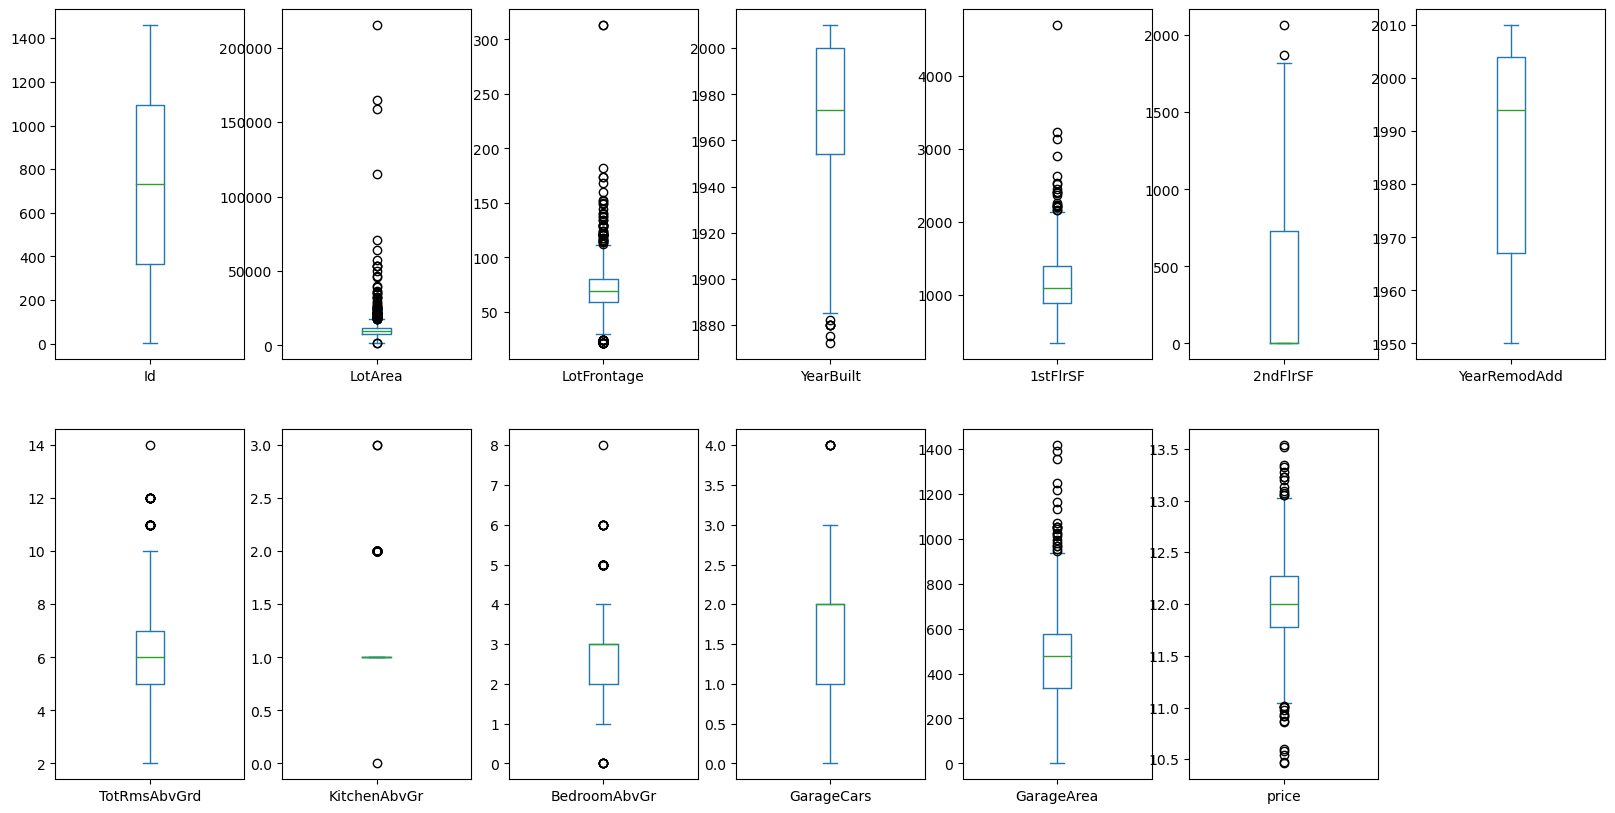

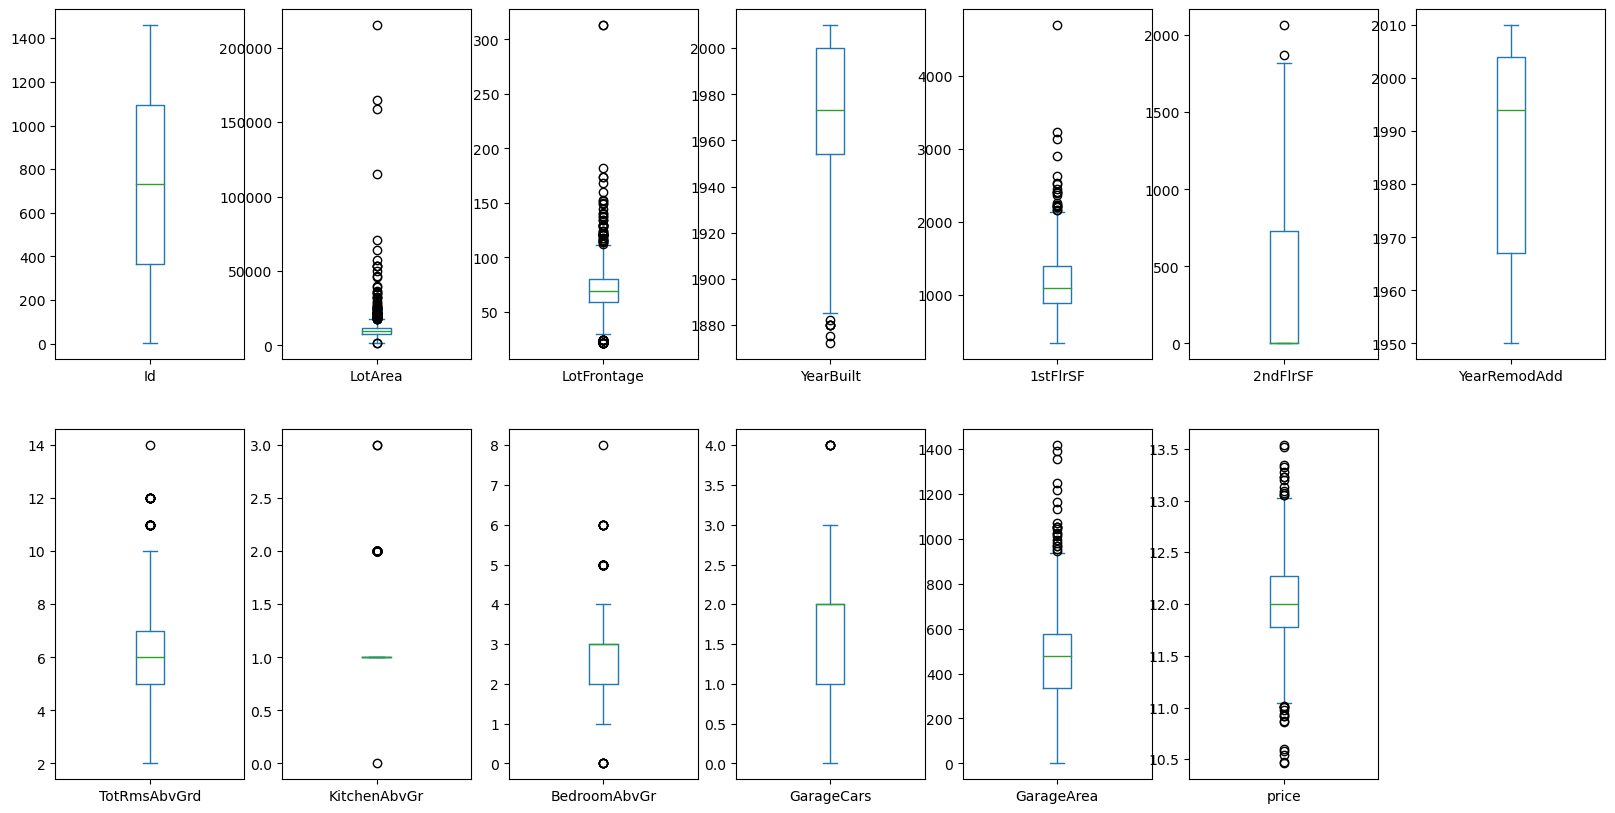

In [128]:
import matplotlib.pyplot as plt
dt17_1.plot(kind='box',subplots=True,layout=(2,len(dt17_1.columns)//2+1),figsize=(20,10))
# plt.tight_layout()
plt.show()

#### 2번
코로나19에 대한 나라별 데이터로 모델링 진행
데이터 출처 : https://www.kaggle.com/imdevskp/corona-virus-report 일부 후처리
데이터 경로 : /kaggle/input/adp-kr-p3/problem2.csv
컬럼

- location : 지역명
- date : 일자
- total_cases : 누적 확인자
- total_deaths : 누적 사망자
- new_tests : 검사자
- population : 인구
- new_vaccinations : 백신 접종자

#### 2-1 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라
상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해서 가독성 있게 만들어라

In [130]:
dt17_2 = pd.read_csv('C:/Users/hylee/python/ADP/data/17/problem2.csv')
dt17_2['ratio'] = dt17_2['total_cases'] / dt17_2['population']

In [134]:
dt17_2.head(n=5)

location        date  total_cases  total_deaths  new_tests  population  \
0  Afghanistan  2020-02-24          5.0           NaN        NaN  39835428.0   
1  Afghanistan  2020-02-25          5.0           NaN        NaN  39835428.0   
2  Afghanistan  2020-02-26          5.0           NaN        NaN  39835428.0   
3  Afghanistan  2020-02-27          5.0           NaN        NaN  39835428.0   
4  Afghanistan  2020-02-28          5.0           NaN        NaN  39835428.0   

   new_vaccinations         ratio  
0               NaN  1.255164e-07  
1               NaN  1.255164e-07  
2               NaN  1.255164e-07  
3               NaN  1.255164e-07  
4               NaN  1.255164e-07

In [137]:
# 결측치 확인
display(dt17_2.isnull().sum())
dt17_2.shape

location                 0
date                     0
total_cases           7588
total_deaths         18857
new_tests            79870
population             980
new_vaccinations    107517
ratio                 8251
dtype: int64

(136931, 8)

#### 특정 조건을 만족하는 Subset만 추출

In [138]:
# 전체 데이터의 결측치 및 일일 확진, 사망자 확인
# 2021-11-30에는 new_tests , new_vaccinations값이 nan 이므로 제외
# 인구수 0인 케이스 제외
import matplotlib.pyplot as plt 
dt17_2 = dt17_2.fillna(0)

dt17_2['date']  = pd.to_datetime(dt17_2['date'])
dt17_2 = dt17_2[dt17_2.date != pd.to_datetime('2021-11-30')]
dt17_2 = dt17_2[dt17_2.population !=0]


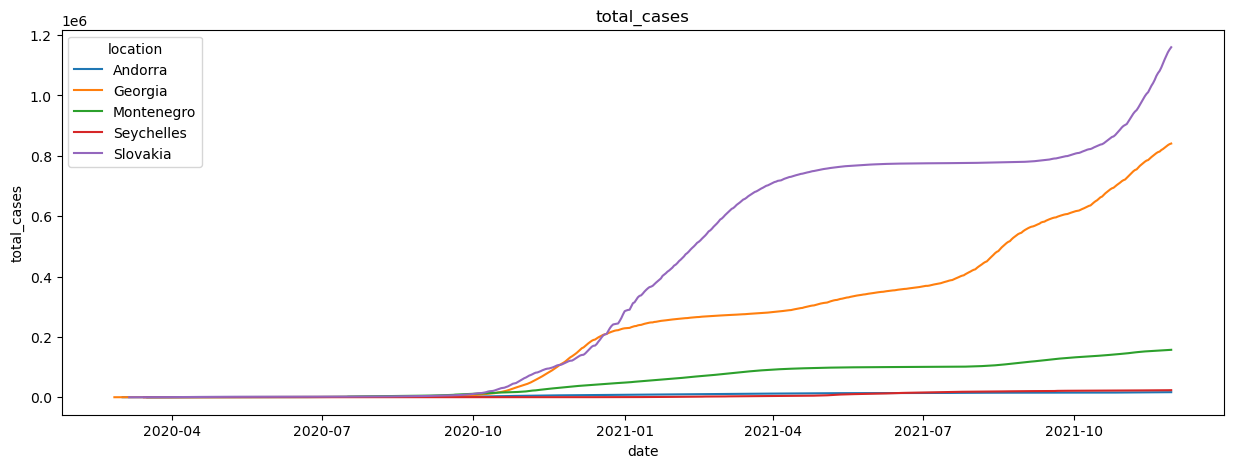

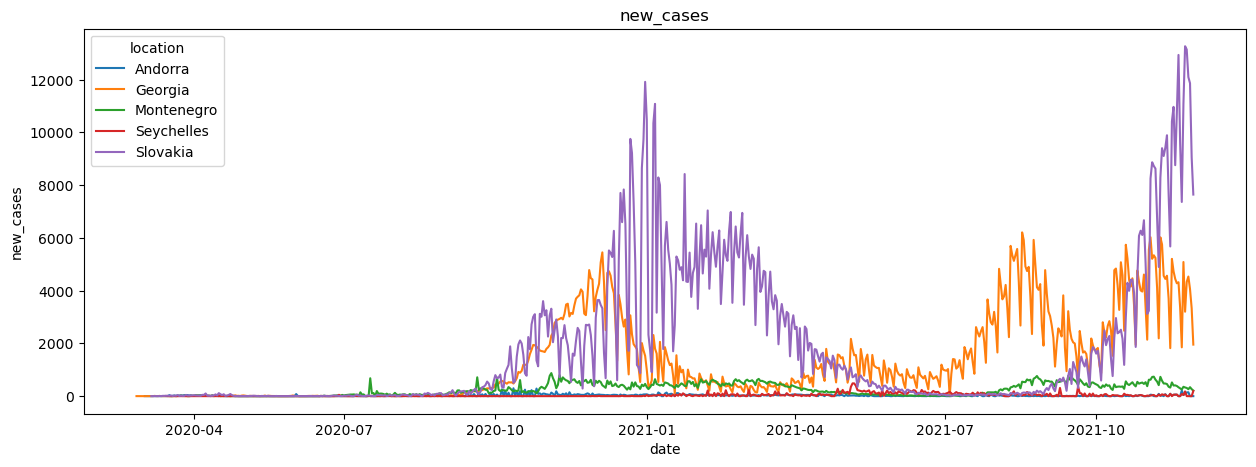

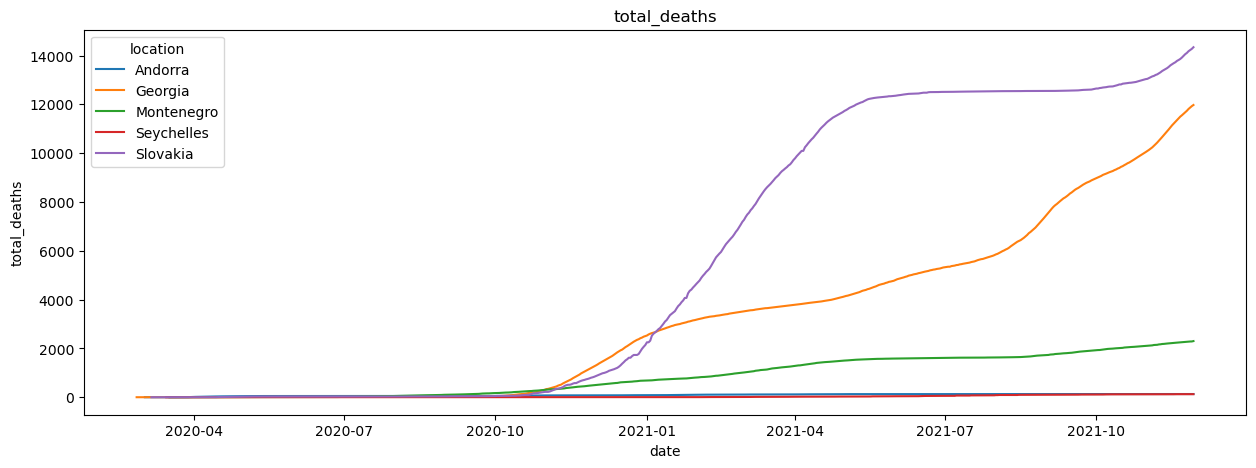

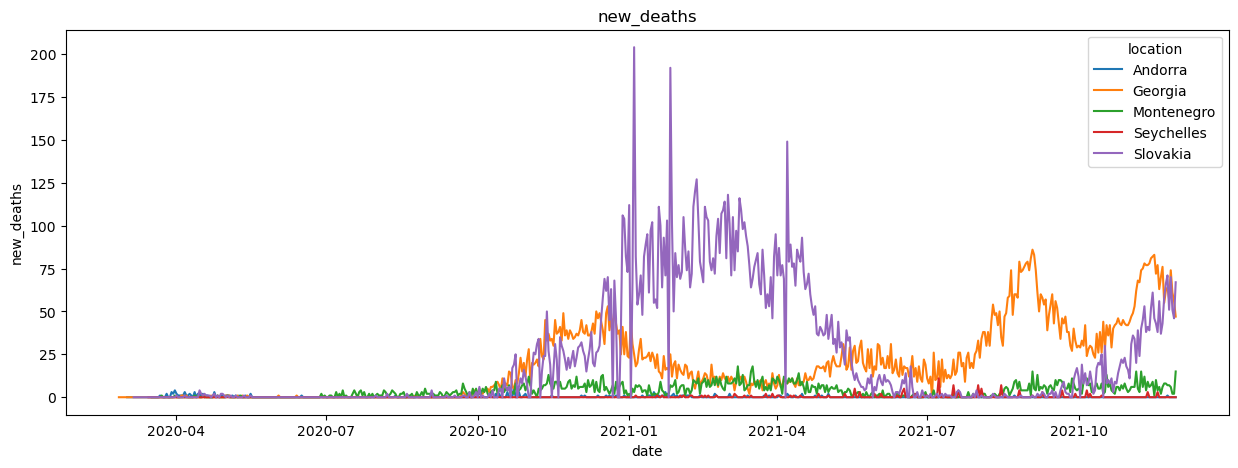

In [140]:

for location in dt17_2.location.unique():
    lo = dt17_2[dt17_2.location == location]
    dt17_2.loc[lo.index,'new_cases'] =lo.total_cases.diff().values
    dt17_2.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]

    dt17_2.loc[lo.index,'new_deaths'] =lo.total_deaths.diff().values
    dt17_2.loc[lo.index[0], 'new_deaths'] = lo['total_deaths'].values[0]
    
    dt17_2.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    dt17_2.loc[lo.index, '7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values

import seaborn as sns
import matplotlib.pyplot as plt


locations = dt17_2.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
target = dt17_2[dt17_2.location.isin(locations)].reset_index(drop=True)
for v in ['total_cases','new_cases','total_deaths','new_deaths']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

#### 2-2 코로나 위험지수를 직접 만들고 그 위험지수에 대한 설명을 적고 위험지수가 높은 국가들 10개를 선정해서 시각화
코로나 위험지수는 코로나로 인한 국가의 위기정도를 표현한다. 코로나 전파 특성상 최근 일주일의 확진자 숫자가 그다음의 일주일에 영향을 준다.     
일일 사망자수는 현재 코로나의 국가 내에서의 치명율을 표현한다. 위기정도는 누적 백신인구에 의해 감소 될수 있다. 
국가간의 비교를 위해 각 국가의 인구수로 나눠주어 값을 스케일링하고, 변수간 보정상수를 통해 정수화를 유도한다

##### 세운 Logic에 해당하는 함수 설정
apply로 데이터 변수에 적용

In [145]:
def ratio_index(x):
    value = (x['7days_new_case'] / x['population'] + x['new_deaths'] / x['population'] - x['total_vacciantions'] / x['population']*0.001) *100
    return value


dt17_2['ratio_index'] = dt17_2.apply(ratio_index,axis=1)

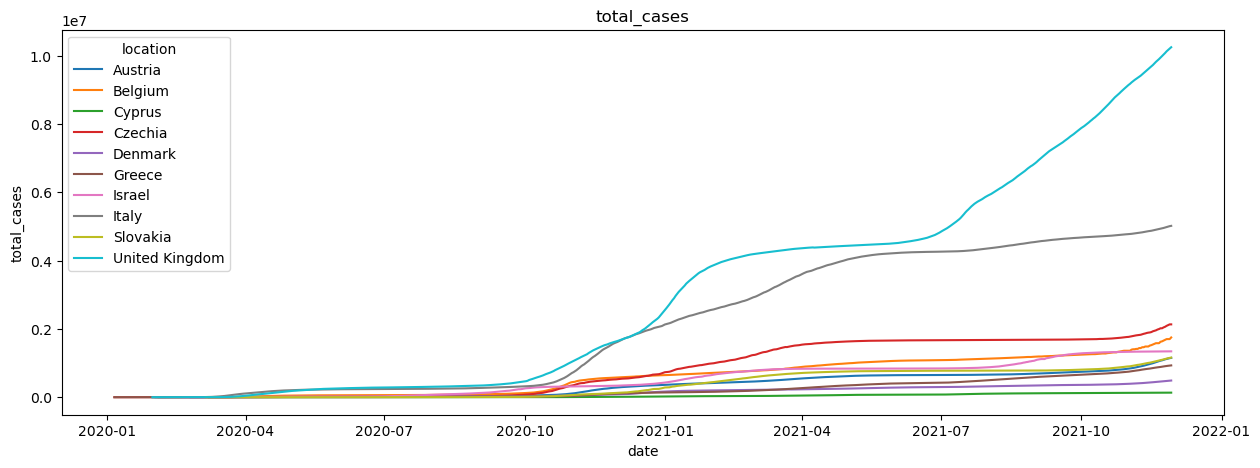

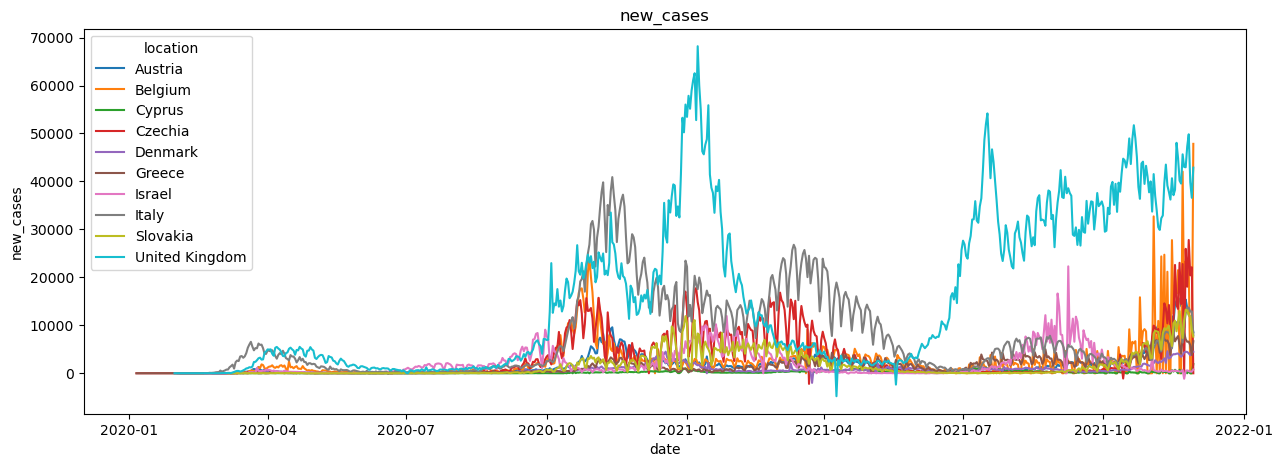

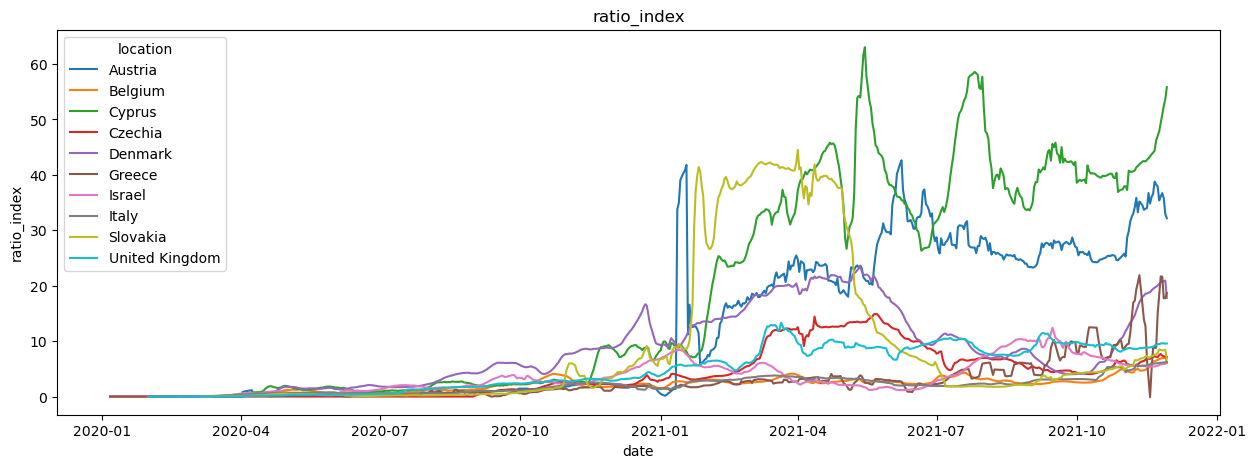

In [146]:
locations = dt17_2.groupby(['location']).tail(1).sort_values('ratio_index',ascending=False).location.head(10).values
target = dt17_2[dt17_2.location.isin(locations)].reset_index(drop=True)

for v in ['total_cases','new_cases','ratio_index']:
    plt.figure(figsize = (15,5))
    plt.title(v)
    sns.lineplot(data=target,x= 'date',y=v,hue='location')
    plt.show()

### ADP 15회 실기 기출문제 1번

- 철강데이터 종속변수 : target
- 데이터 출처 : https://www.kaggle.com/uciml/faulty-steel-plates
- 데이터 경로 : /kaggle/input/adp-kr-p4/problem1.csv

#### 1-1 EDA(탐색적 데이터 분석)을 하시오
(시각화와 통계량을 제시할 것)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

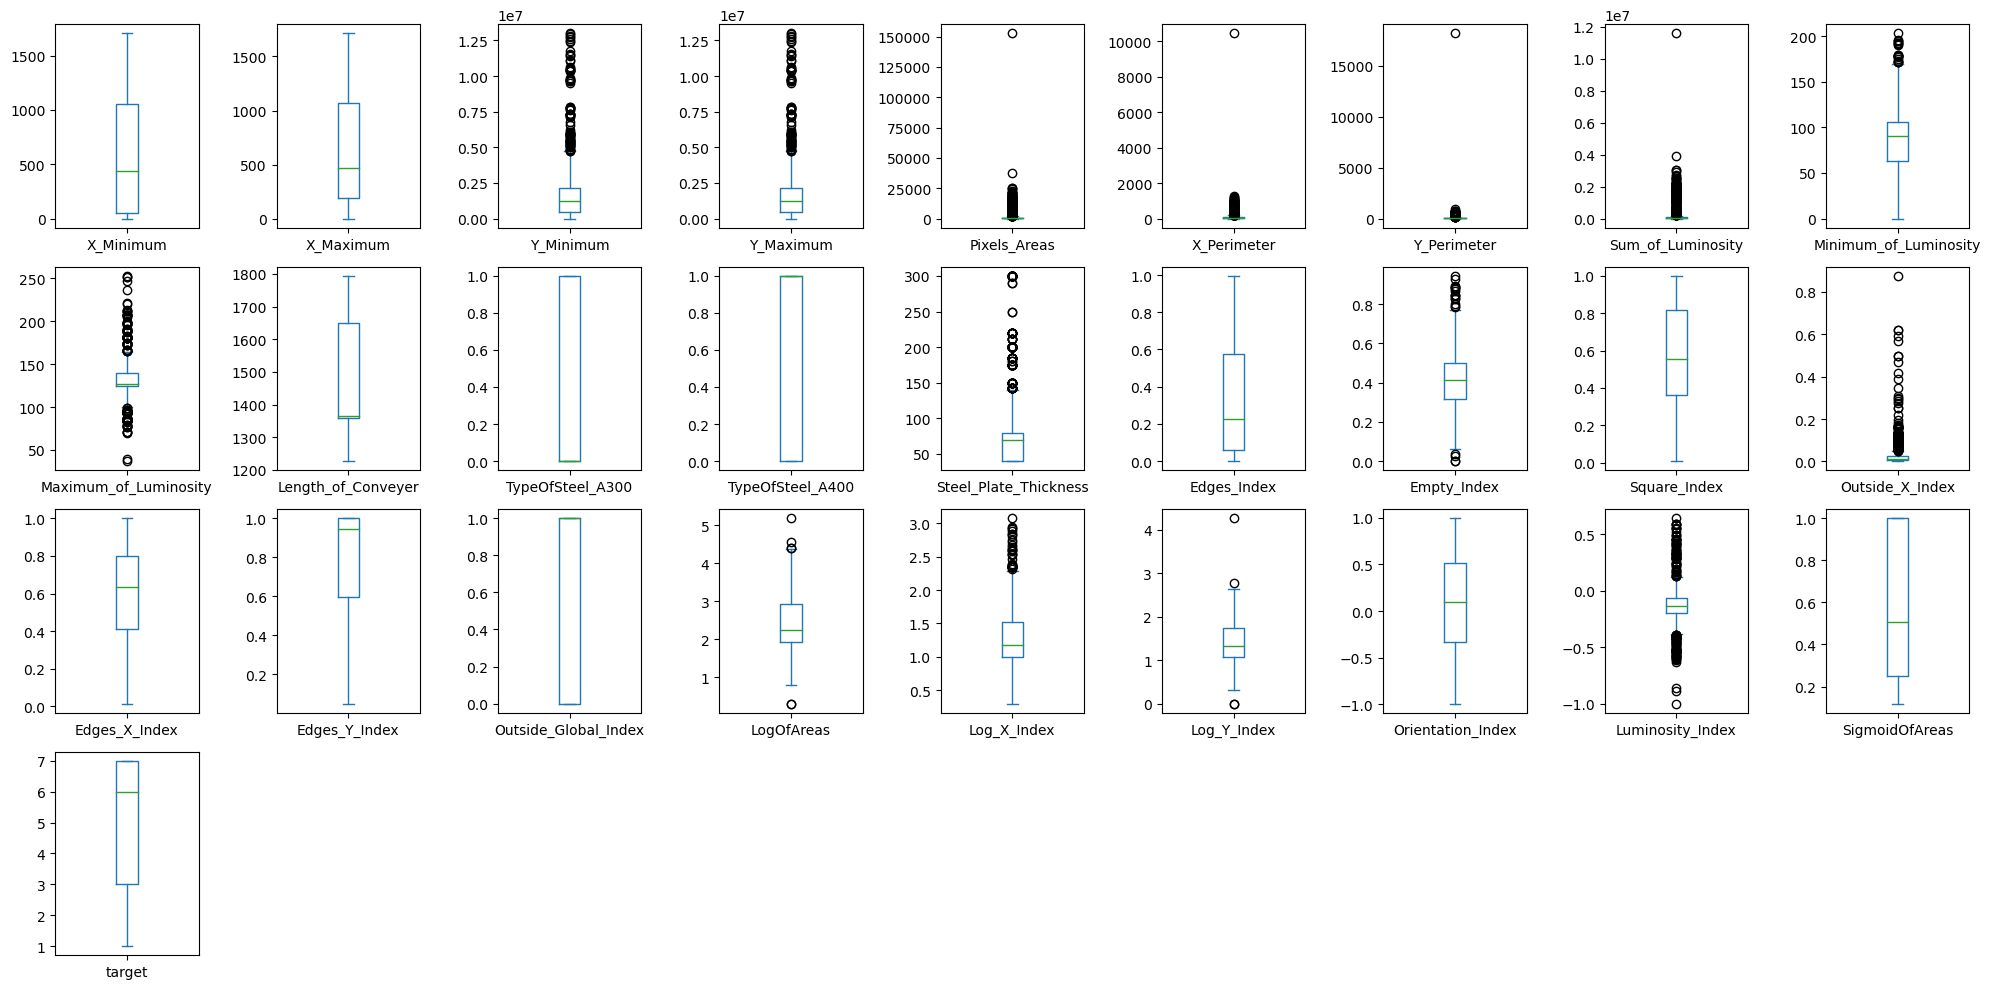

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    108                1687                 1   
1                    123                1687                 1   
2                    125                1623                 1   
3                    126                1353                 0   
4                    126                1353                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 0                     80       0.0498       0.2415   
1                 0                     80       0.7647       0.3793   
2                 0                    100       0.9710       0.3426   
3                 1                    290       0.7287       0.4413   
4                 1                    185       0.0695       0.4486   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.1818           0.0047         0.4706         1.0000   
1        0.2069           0.0036         0.6000         0.9667   
2        0.3333           0.0037         0.7500         0.9474   
3        0.1556           0.0052         0.5385         1.0000   
4        0.0662           0.0126         0.2833         0.9885   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553   
3                   1.0      2.2455       0.8451       1.6532   
4                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  target  
0             0.8182           -0.2913          0.5822       1  
1             0.7931           -0.1756          0.2984       1  
2             0.6667           -0.1228          0.2150       1  
3             0.8444           -0.1568          0.5212       1  
4             0.9338           -0.1992          1.0000       1

In [147]:
df = pd.read_csv('C:/Users/hylee/python/ADP/data/15/problem1.csv')
df.info()

import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout = (4,9),figsize=(20,10))
plt.tight_layout()
plt.show()

pd.set_option('display.max_columns',30)
df.head()

##### Numeric이지만 범주형 변수 성격을 갖는 Column 선별하기

In [148]:
print('numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다')
for col in df.columns:
    target = df[col]
    if target.nunique() <=10:
        print(col,target.unique())
        display(target.value_counts().to_frame())
        print()

numeric 타입이지만 범주형 변수의 경우 아래와 같은 분포를보인다
TypeOfSteel_A300 [1 0]


TypeOfSteel_A300
0              1164
1               777


TypeOfSteel_A400 [0 1]


TypeOfSteel_A400
1              1164
0               777


Outside_Global_Index [1.  0.5 0. ]


Outside_Global_Index
1.0                  1072
0.0                   778
0.5                    91


target [1 2 3 4 5 6 7]


target
7     673
6     402
3     391
2     190
1     158
4      72
5      55

#### 1-2 변수선택(VIF), 파생변수 생성, 데이터 분할(Train/Test(20%))
(시각화와 통계량을 제시할 것)

파생변수로 X_Minimum와 X_Maximum의 평균값을 av 컬럼에 만든다
vif값이 10 미만인 변수를, 다중공선성이 없는 변수로 판단한다

In [149]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

df['av']  = (df['X_Minimum'] + df['X_Maximum'])/2
value ='+'.join(list(df.drop(columns=['target']).columns))
model = ols(f'target ~ {value}', df)
model.exog_names


vif = pd.DataFrame({'col': col, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, col in enumerate(model.exog_names[1:])).sort_values('VIF',ascending=False)

vif

c:\Users\hylee\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\hylee\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


col           VIF
13  Steel_Plate_Thickness           inf
1               X_Maximum           inf
2               Y_Minimum           inf
12       TypeOfSteel_A400           inf
4            Pixels_Areas  1.703264e+10
3               Y_Maximum  1.703244e+10
7       Sum_of_Luminosity  1.559205e+03
22            Log_X_Index  1.185824e+03
18          Edges_X_Index  1.000563e+03
23            Log_Y_Index  4.911691e+02
5             X_Perimeter  4.907086e+02
24      Orientation_Index  4.055794e+02
8   Minimum_of_Luminosity  3.661924e+02
6             Y_Perimeter  1.687822e+02
25       Luminosity_Index  3.826412e+01
16           Square_Index  2.645508e+01
26         SigmoidOfAreas  1.293111e+01
27                     av  9.611151e+00
20   Outside_Global_Index  9.438620e+00
9   Maximum_of_Luminosity  8.324323e+00
10     Length_of_Conveyer  6.036402e+00
21             LogOfAreas  5.831323e+00
19          Edges_Y_Index  5.708240e+00
11       TypeOfSteel_A300  1.931458e+00
17        Outside_X_Index  1.838381e+00
15            Empty_Index  1.321925e+00
14            Edges_Index  1.266577e+00
0               X_Minimum  0.000000e+00

vif값이 10 미만인 Outside_Global_Index,Maximum_of_Luminosity , Length_of_Conveyer, LogOfAreas, Edges_Y_Index, TypeOfSteel_A300, Outside_X_Index, Empty_Index, Edges_Index, X_Minimum, av 정도가 다중공선성이 없는 변수로 판단한다

In [150]:
df2 = df.copy()[list(vif[vif.VIF<10].col.values)+['target']]

from sklearn.model_selection import train_test_split

X = df2.drop(columns=['target'])
y = df2['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=32,test_size=0.2,stratify=y)

#### 1-3 종속변수들중 "1"인지 아닌지 판단하려한다. 종속변수를 1과 1이 아닌 값(이항)으로 치환하고 로지스틱 회귀 분석을 실시하라.
confusionMatrix를 확인하고 최적의 cut off value 정하여라.

In [ ]:
y_train_l = y_train.copy()
y_test_l = y_test.copy()

y_train_l =y_train_l.map(lambda x : 1 if x==1 else 0)
y_test_l =y_test_l.map(lambda x : 1 if x==1 else 0)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train.values, y_train_l.values)


pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
from sklearn.metrics import classification_report,roc_curve
